In [27]:
import pandas as pd
import yfinance as yf
import datetime as dt
import gspread
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [28]:
# Função para baixar os dados financeiros das empresas
def dados_portfolio():
    # Definir o intervalo de datas: de 01/01/2022 até 02/07/2024.
    start = dt.datetime(2022, 1, 1)
    end = dt.datetime(2024, 7, 2)

    # Lista de tickers das empresas
    tickers = ['ITUB4.SA', 'VALE3.SA', 'PETR4.SA', 'BBDC4.SA', 'B3SA3.SA', 'ABEV3.SA', 'PETR3.SA', 'BBAS3.SA', 'BBDC3.SA',
           'BBSE3.SA', 'RENT3.SA', 'ITSA4.SA', 'BBSE3.SA', 'LREN3.SA', 'JBSS3.SA', 'NTCO3.SA', 'GGBR4.SA', 'WEGE3.SA',
           'SUZB3.SA', 'IRBR3.SA', 'ELET3.SA', 'ELET6.SA', 'CSAN3.SA', 'BRML3.SA', 'CIEL3.SA', 'BRFS3.SA', 'CCRO3.SA',
           'HYPE3.SA', 'MRFG3.SA', 'SBSP3.SA', 'RAIL3.SA', 'EMBR3.SA', 'BTOW3.SA', 'BEEF3.SA', 'VVAR3.SA', 'TIMP3.SA',
           'EGIE3.SA', 'BRDT3.SA', 'CSNA3.SA', 'QUAL3.SA', 'USIM5.SA', 'MULT3.SA', 'GOLL4.SA', 'IRBR3.SA', 'HAPV3.SA',
           'EVEN3.SA', 'MGLU3.SA', 'CYRE3.SA', 'SBFG3.SA', 'MRVE3.SA', 'AZUL4.SA', 'YDUQ3.SA', 'CMIG4.SA', 'BRAP4.SA',
           'TOTS3.SA', 'CCXC3.SA', 'PCAR3.SA', 'ENEV3.SA', 'CRFB3.SA', 'UGPA3.SA', 'CVCB3.SA', 'CIEL3.SA', 'BRML3.SA',
           'BRKM5.SA', 'MRFG3.SA', 'CSMG3.SA', 'LAME4.SA', 'GOAU4.SA', 'UGPA3.SA', 'VIVT4.SA', 'HYPE3.SA', 'SMTO3.SA',
           'IRBR3.SA', 'MRVE3.SA', 'BIDI4.SA', 'QUAL3.SA', 'KLBN11.SA', 'SMLS3.SA', 'ECOR3.SA', 'EVEN3.SA', 'BBDC3.SA',
           'LREN3.SA', 'TAEE11.SA', 'TUPY3.SA', 'ECOR3.SA', 'HGTX3.SA', 'CMIG4.SA', 'BRAP4.SA', 'GGBR4.SA', 'SUZB3.SA',
           'ENBR3.SA', 'CVCB3.SA', 'IRBR3.SA', 'BRKM5.SA']

    # Criar um DataFrame vazio para armazenar os dados
    df = pd.DataFrame()

    # Baixar os dados de fechamento para cada empresa e armazenar no DataFrame df
    for ticker in tickers:
        try:
            data = yf.download(ticker, start=start, end=end)['Close']
            # Renomear a coluna do DataFrame para incluir o ticker. split é quebra
            df[ticker.split('.')[0]] = data
        except Exception as e:
            print(f"Erro ao baixar dados para {ticker}: {e}")
            #vou apagar os erros
            df = df.drop(ticker.split('.')[0], axis=1)

    return df

In [29]:
dados = dados_portfolio()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [30]:
print(dados)

                ITUB4      VALE3      PETR4      BBDC4  B3SA3  ABEV3  \
Date                                                                   
2022-01-03  21.510000  78.000000  29.090000  17.900000  10.72  15.33   
2022-01-04  22.120001  77.080002  29.200001  18.000000  10.95  15.31   
2022-01-05  21.700001  77.809998  28.070000  17.872726  10.72  15.01   
2022-01-06  22.139999  79.379997  28.049999  18.127272  10.98  14.77   
2022-01-07  22.629999  84.000000  28.180000  18.390909  11.24  14.53   
...               ...        ...        ...        ...    ...    ...   
2024-06-25  32.439999  60.650002  37.029999  12.340000  10.32  11.38   
2024-06-26  32.380001  61.400002  37.090000  12.370000  10.22  11.45   
2024-06-27  32.439999  61.560001  37.709999  12.420000  10.40  11.46   
2024-06-28  32.410000  62.220001  38.049999  12.380000  10.24  11.41   
2024-07-01  32.240002  63.139999  38.630001  12.270000  10.47  11.45   

                PETR3      BBAS3      BBDC3      BBSE3  ...  VI

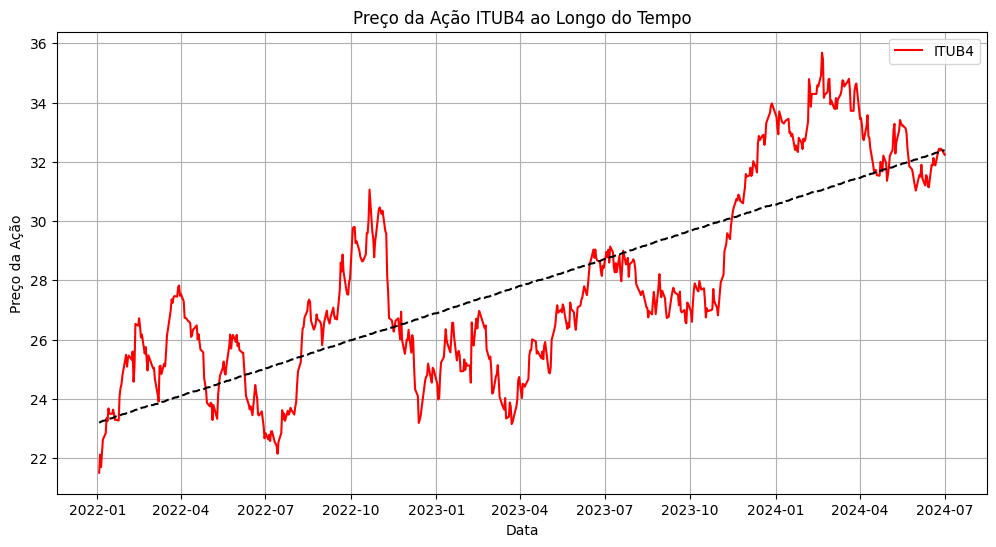

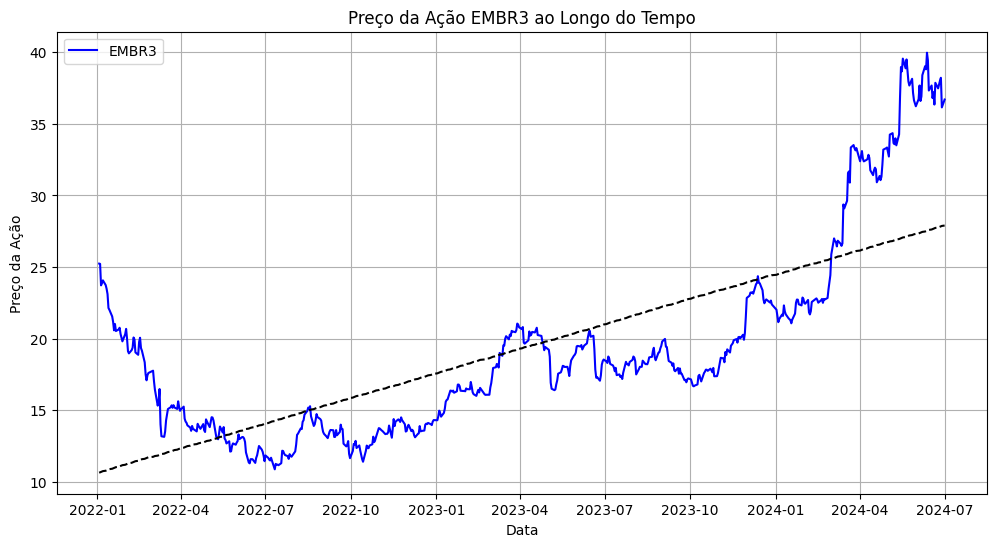

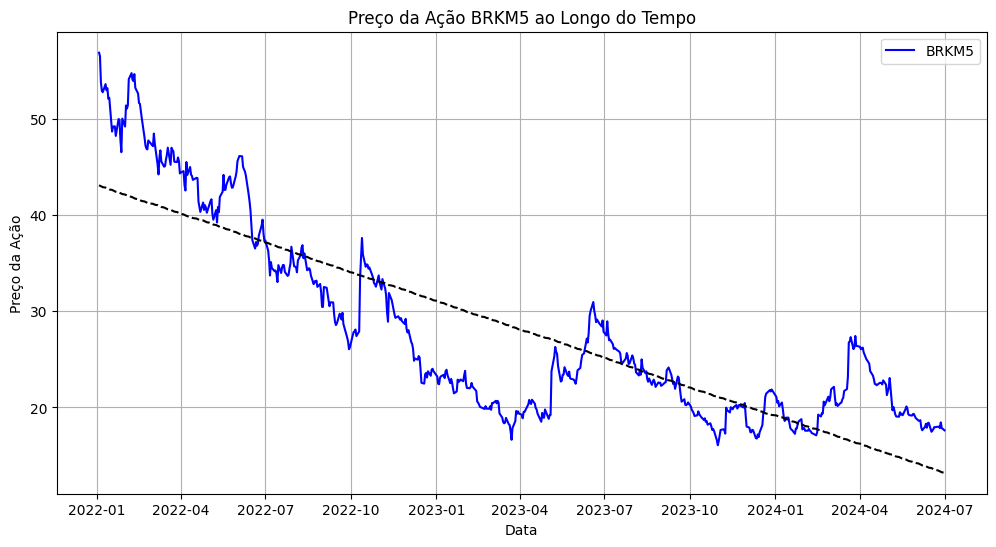

In [31]:
#Escreva os tickers que deseja ver os dados. Exemplo: vou ver os dados do Itaú, da Embraer e da Braskem:
empresas = ['ITUB4', 'EMBR3', 'BRKM5']

# Plotar um gráfico de linha para cada coluna da planilha
for empresa in empresas:
    plt.figure(figsize=(12, 6))

    # Desenho um gráfico de linhas para cada empresa
    plt.plot(dados.index, dados[empresa], label=empresa, color=np.random.choice(['red', 'blue', 'green']))

    # Desenho uma linha de tendência para empresa
    coef = np.polyfit(range(len(dados)), dados[empresa], 1)
    tendencia = np.polyval(coef, range(len(dados)))
    plt.plot(dados.index, tendencia, linestyle='--', color='black')

    plt.xlabel('Data')
    plt.ylabel('Preço da Ação')
    plt.title(f'Preço da Ação {empresa} ao Longo do Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:
empresas = dados.columns

# Plotar um gráfico de linha para cada coluna da planilha
for empresa in empresas:
    plt.figure(figsize=(12, 6))

    # Desenho um gráfico de linhas para cada empresa
    plt.plot(dados.index, dados[empresa], label=empresa, color=np.random.choice(['red', 'blue', 'green']))

    plt.xlabel('Data')
    plt.ylabel('Preço da Ação')
    plt.title(f'Preço da Ação {empresa} ao Longo do Tempo')
    plt.legend()
    plt.grid(True)
    plt.show()

Output hidden; open in https://colab.research.google.com to view.